# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1


The pictures show 2 estimation of:

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Integrated via Monte Carlo in 2 methods:
- Accept-reject method : sampling a uniform distribution in $[0,1]$.
- Importance sampling: linear and parabola approximationa.

The estimations of $I$</span> and their uncertainties are show in function of the number of blocks $N$</font>.

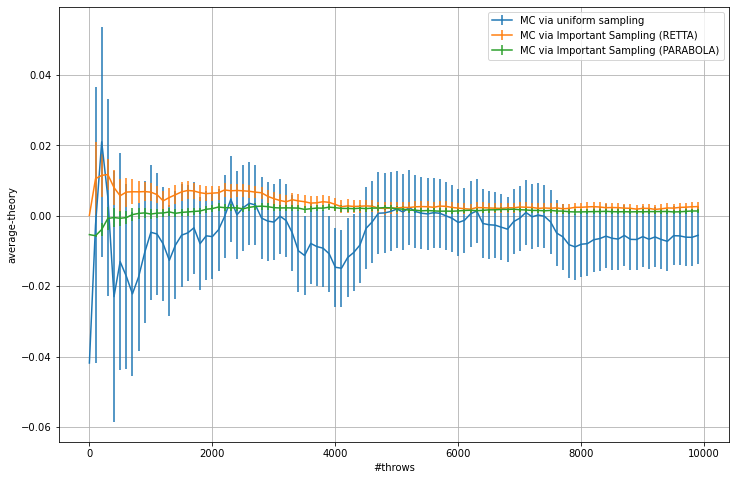

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=10000
N=100
plt.figure(figsize=(12,8))
sum_prog_MCimpsam_retta, err_prog_MCimpsam_retta = np.loadtxt("./data/MC_IS_lin.dat", usecols=(0,1), delimiter=',', unpack='true')
sum_prog_MCimpsam_prabola, err_prog_MCimpsam_parabola = np.loadtxt("./data/MC_IS_parabola.dat", usecols=(0,1), delimiter=',', unpack='true')
sum_prog_MCsimple, err_prog_MCsimple = np.loadtxt("./data/MC_uniform.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(100)*M/N
teo = np.ones(N);

plt.errorbar(x,sum_prog_MCsimple-teo,yerr=err_prog_MCsimple,label="MC via uniform sampling")
plt.errorbar(x,sum_prog_MCimpsam_retta-teo,yerr=err_prog_MCimpsam_retta,label="MC via Important Sampling (RETTA)")
plt.errorbar(x,sum_prog_MCimpsam_prabola-teo,yerr=err_prog_MCimpsam_parabola,label="MC via Important Sampling (PARABOLA)")
plt.legend();
plt.xlabel('#throws')
plt.ylabel('average-theory')
plt.grid(True)
plt.show()

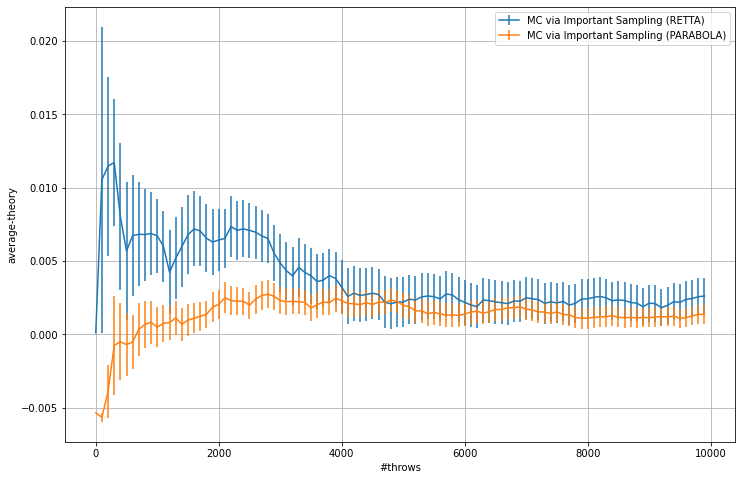

In [2]:
plt.figure(figsize=(12,8))

plt.errorbar(x,sum_prog_MCimpsam_retta-teo,yerr=err_prog_MCimpsam_retta,label="MC via Important Sampling (RETTA)")
plt.errorbar(x,sum_prog_MCimpsam_prabola-teo,yerr=err_prog_MCimpsam_parabola,label="MC via Important Sampling (PARABOLA)")
plt.legend();
plt.xlabel('#throws')
plt.ylabel('average-theory')
plt.grid(True)
plt.show()

### Exercise 02.2
Simulations about 3D Random Walks (RW) on a cubic lattice (1) and in the continuum (2).
The picture show the central distant trend: $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.
Moreover we observe trends identical behavior and a diffusive like $f(N)=k\sqrt{N}$.


<FIT INFO> DISCRETE RW: k =  0.09926137924036493  +-  3.143746867046331e-10
<FIT INFO> DISCRETE RW: k =  0.09965949735181276  +-  6.866747244237541e-10


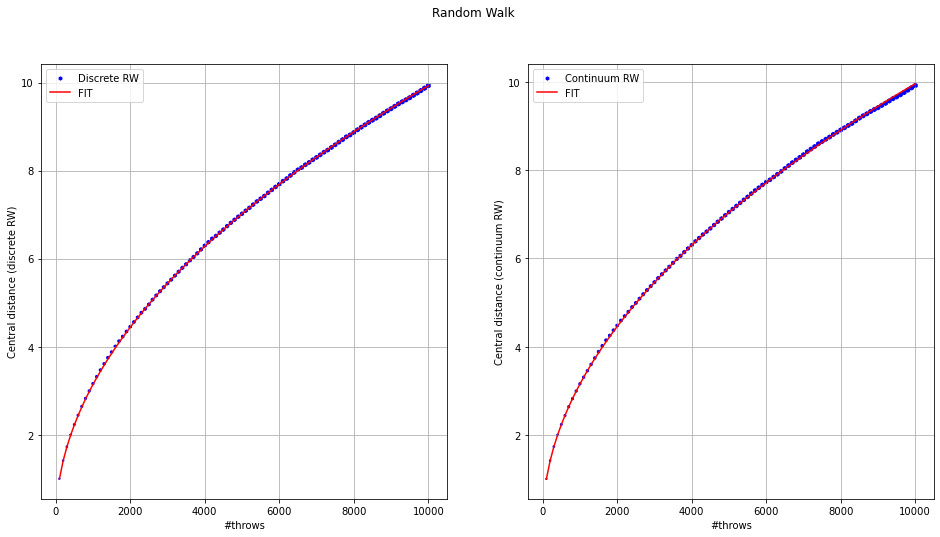

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

M=10000
N=100

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)


discrete, discrete_err = np.loadtxt("./data/RW_discrete.dat", usecols=(0,1), delimiter=',', unpack='true')
continuum, continuum_err = np.loadtxt("./data/RW_continuum.dat", usecols=(0,1), delimiter=',', unpack='true')

x = np.arange(1,101)*M/N

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
fig.suptitle('Random Walk')

#plot error bars
ax1.errorbar(x, discrete, yerr = discrete_err, ls = "None", color = "b")
ax2.errorbar(x,continuum,yerr=continuum_err, ls = "None", color = "b")
#plot scatter plot
ax1.scatter(x, discrete, s = 2* discrete, marker = "h", color = "b",label="Discrete RW")
ax2.scatter(x,continuum,s = 2* continuum, marker = "h", color = "b",label="Continuum RW")


p_opt, p_cov = curve_fit(f, x, discrete)
y_fit = f(x,p_opt)
ax1.plot(x,y_fit,label="FIT",color ="r") # plotting fitted function
print("<FIT INFO> DISCRETE RW: k = ", p_opt[0]," +- ", p_cov[0][0])

p_opt, p_cov = curve_fit(f, x, continuum)
y_fit = f(x,p_opt)
ax2.plot(x,y_fit,label="FIT",color="r") # plotting fitted function
print("<FIT INFO> DISCRETE RW: k = ", p_opt[0]," +- ", p_cov[0][0])
ax1.set_xlabel('#throws');ax2.set_xlabel('#throws')
ax1.set_ylabel('Central distance (discrete RW)');ax2.set_ylabel('Central distance (continuum RW)')

ax1.grid(); ax2.grid()
ax1.legend(); ax2.legend();

plt.show()